In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
x = pd.read_csv(r"C:\Users\sree0\Downloads\biden.csv")

C:\Users\sree0\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,8,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
y = pd.read_csv(r"C:\Users\sree0\Downloads\trump_final_result.csv")

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171237 entries, 0 to 171236
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            171237 non-null  object 
 1   tweet                 171237 non-null  object 
 2   likes                 171236 non-null  float64
 3   retweet_count         171236 non-null  float64
 4   user_id               171236 non-null  float64
 5   user_followers_count  171236 non-null  object 
 6   user_location         171236 non-null  object 
 7   lat                   171236 non-null  float64
 8   long                  171236 non-null  object 
 9   city                  84290 non-null   object 
 10  country               171236 non-null  object 
 11  continent             171236 non-null  object 
 12  state                 131563 non-null  object 
 13  processed_text        171236 non-null  object 
 14  ner                   171236 non-null  object 
 15  

In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255444 entries, 0 to 255443
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            255444 non-null  object 
 1   tweet                 255444 non-null  object 
 2   likes                 255441 non-null  float64
 3   retweet_count         255441 non-null  float64
 4   user_id               255441 non-null  float64
 5   user_followers_count  255441 non-null  object 
 6   user_location         255441 non-null  object 
 7   lat                   255441 non-null  float64
 8   long                  255439 non-null  object 
 9   city                  126817 non-null  object 
 10  country               255441 non-null  object 
 11  continent             255439 non-null  object 
 12  state                 191052 non-null  object 
 13  processed_text        255441 non-null  object 
 14  ner                   255440 non-null  object 
 15  

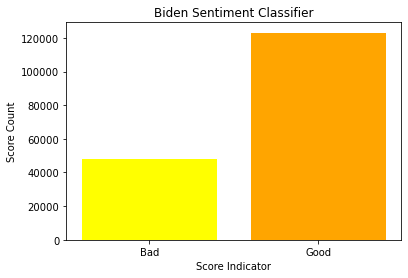

In [20]:
## Biden Score - Good or Bad Graph
x_required = x[['user_id','predict_score_bi','entity']]
x_required.fillna('null',inplace=True)
x_required = x_required[~x_required["predict_score_bi"].str.contains('R',na=False)]
x_required = x_required[~x_required["predict_score_bi"].str.contains('S',na=False)]
x_required = x_required[~x_required["predict_score_bi"].str.contains('null',na=False)]
x_required["predict_score_bi"] = pd.to_numeric(x_required['predict_score_bi'], downcast="float")
x_required['indicator'] = x_required['predict_score_bi'].apply(lambda x: "Good" if x >= 0.5 else "Bad")
x_count = x_required.groupby('indicator').count().reset_index()

##plotting graph
plt.bar(x_count['indicator'], x_count['predict_score_bi'],color=['yellow','orange'])
plt.xlabel("Score Indicator")
plt.ylabel("Score Count")
plt.title("Biden Sentiment Classifier")
plt.show()

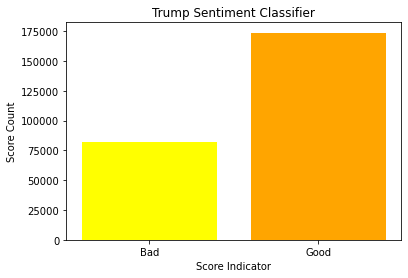

In [21]:
## Trump Score - Good or Bad Graph
y_required = y[['user_id','predict_score_bi']]
y_required.fillna('null',inplace=True)
y_required = y_required[~y_required["predict_score_bi"].str.contains('R',na=False)]
y_required = y_required[~y_required["predict_score_bi"].str.contains('S',na=False)]
y_required = y_required[~y_required["predict_score_bi"].str.contains('null',na=False)]
y_required["predict_score_bi"] = pd.to_numeric(y_required['predict_score_bi'], downcast="float")
y_required['indicator'] = y_required['predict_score_bi'].apply(lambda x: "Good" if x >= 0.5 else "Bad")
y_count = y_required.groupby('indicator').count().reset_index()

##plotting graph
plt.bar(y_count['indicator'], y_count['predict_score_bi'],color=['yellow','orange'])
plt.xlabel("Score Indicator")
plt.ylabel("Score Count")
plt.title("Trump Sentiment Classifier")
plt.show()

C:\Users\sree0\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-14-1f68aa9d4e76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_country.dropna(inplace=True)
<ipython-input-14-1f68aa9d4e76>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_country.dropna(inplace=True)


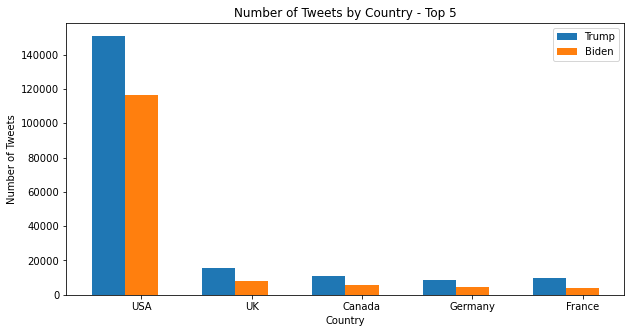

In [14]:
##Who got more tweets in different countries?
y_country=y[['user_id','country']]
y_country.loc[y_country['country'] == 'United States', 'country'] = "United States of America"
x_country=x[['user_id','country']]
x_country.loc[x_country['country'] == 'United States', 'country'] = "United States of America"
y_country.dropna(inplace=True)
x_country.dropna(inplace=True)
y_count_user = y_country.groupby('country').count().reset_index()
x_count_user = x_country.groupby('country').count().reset_index()
y_count_user.rename(columns={"user_id":"trump_tweeters"},inplace=True)
x_count_user.rename(columns={"user_id":"biden_tweeters"},inplace=True)
y_count_top_5 = y_count_user.sort_values("trump_tweeters",ascending=False).head(5)
x_count_top_5 = x_count_user.sort_values("biden_tweeters",ascending=False).head(5)
##Mergin the two dataframes
merged_top = pd.merge(x_count_top_5,y_count_top_5,on = "country")
##Plotting
N = 5
size = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     
plt.bar(size, merged_top['trump_tweeters'] , width, label='Trump')
plt.bar(size + width, merged_top['biden_tweeters'], width, label='Biden')

plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Country - Top 5')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(size + width , ('USA', 'UK', 'Canada','Germany','France'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

<ipython-input-15-564d983efaaf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_like.dropna(inplace=True)
<ipython-input-15-564d983efaaf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_like.dropna(inplace=True)


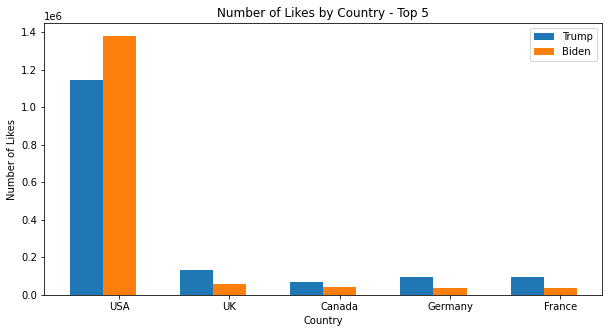

In [15]:
###More likes in different countries
y_like=y[['likes','country']]
y_like.loc[y_like['country'] == 'United States', 'country'] = "United States of America"
x_like=x[['likes','country']]
x_like.loc[x_like['country'] == 'United States', 'country'] = "United States of America"
y_like.dropna(inplace=True)
x_like.dropna(inplace=True)
y_like_user = y_like.groupby('country').sum().reset_index()
x_like_user = x_like.groupby('country').sum().reset_index()
y_like_user.rename(columns={"likes":"trump_likes"},inplace=True)
x_like_user.rename(columns={"likes":"biden_likes"},inplace=True)
y_like_top_5 = y_like_user.sort_values("trump_likes",ascending=False).head(5)
x_like_top_5 = x_like_user.sort_values("biden_likes",ascending=False).head(5)
##Mergin the two dataframes
merged_top_3 = pd.merge(x_like_top_5,y_like_top_5,on = "country")
##Plotting
N = 5
size = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     
plt.bar(size, merged_top_3['trump_likes'] , width, label='Trump')
plt.bar(size + width, merged_top_3['biden_likes'], width, label='Biden')

plt.xlabel('Country')
plt.ylabel('Number of Likes')
plt.title('Number of Likes by Country - Top 5')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(size + width , ('USA', 'UK', 'Canada','Germany','France'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [16]:
##Most frequent entity 
x_entity = x[['user_id','entity']]
y_entity = y[['user_id','entity']]
y_entity_use = y_entity.groupby('entity').count().reset_index()
x_entity_use = x_entity.groupby('entity').count().reset_index()
y_entity_top_5 = y_entity_use.sort_values("user_id",ascending=False).head(5)
x_entity_top_5 = x_entity_use.sort_values("user_id",ascending=False).head(5)

Text(0.5, 1.0, 'Top Entities for Biden')

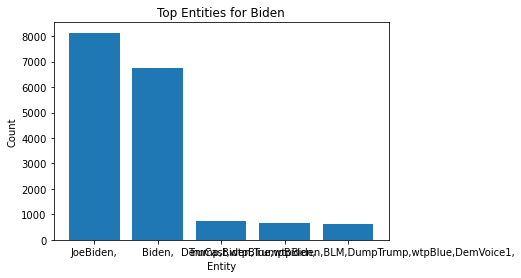

In [23]:
plt.bar(x_entity_top_5['entity'],x_entity_top_5['user_id'])
plt.xlabel("Entity")
plt.ylabel("Count")
plt.title("Top Entities for Biden")

Text(0.5, 1.0, 'Top Entities for Trump')

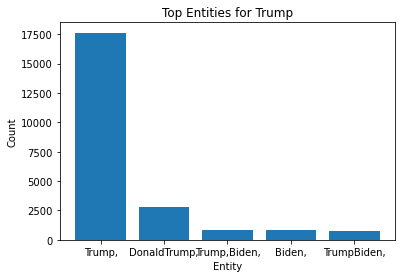

In [24]:
plt.bar(y_entity_top_5['entity'],y_entity_top_5['user_id'])
plt.xlabel("Entity")
plt.ylabel("Count")
plt.title("Top Entities for Trump")

<ipython-input-25-2b98bd33bab4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_state.dropna(inplace=True)
<ipython-input-25-2b98bd33bab4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_state.dropna(inplace=True)


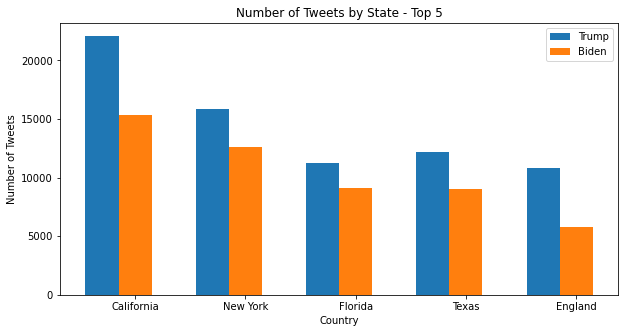

In [25]:
###Top tweets by state for both trump & biden
y_state=y[['user_id','state']]
#y_country.loc[y_country['country'] == 'United States', 'country'] = "United States of America"
x_state=x[['user_id','state']]
#x_country.loc[x_country['country'] == 'United States', 'country'] = "United States of America"
y_state.dropna(inplace=True)
x_state.dropna(inplace=True)
y_state_user = y_state.groupby('state').count().reset_index()
x_state_user = x_state.groupby('state').count().reset_index()
y_state_user.rename(columns={"user_id":"trump_tweeters"},inplace=True)
x_state_user.rename(columns={"user_id":"biden_tweeters"},inplace=True)
y_state_top_5 = y_state_user.sort_values("trump_tweeters",ascending=False).head(5)
x_state_top_5 = x_state_user.sort_values("biden_tweeters",ascending=False).head(5)
##Mergin the two dataframes
merged_top_2 = pd.merge(x_state_top_5,y_state_top_5,on = "state")
##Plotting
N = 5
size = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3     
plt.bar(size, merged_top_2['trump_tweeters'] , width, label='Trump')
plt.bar(size + width, merged_top_2['biden_tweeters'], width, label='Biden')

plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by State - Top 5')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(size + width , ('California', 'New York', 'Florida','Texas','England'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()